In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cavsim
from cavsim import Measure
from cavsim.connectors import BaseConnector, Connector
from cavsim.channels import ImportChannel, ExportChannel
from cavsim.components import BaseComponent, Component
from cavsim.solvers import BaseSolver, SimpleSolver
from cavsim.fluids import Fluid

In [3]:
from cavsim.pipes.pipe import Pipe
from cavsim.boundaries.left_boundary_pressure import LeftBoundaryPressure
from cavsim.boundaries.left_boundary_velocity import LeftBoundaryVelocity
from cavsim.boundaries.right_boundary_pressure import RightBoundaryPressure
from cavsim.boundaries.right_boundary_velocity import RightBoundaryVelocity
from cavsim.boundaries.simple_pipe_connector import PipeConnectorSimple
from cavsim.boundaries.zeta_joint import ZetaJoint
from cavsim.boundaries.simple_t_joint import SimpleTJoint
from cavsim.boundaries.simple_right_gasdampener import RightGasBubbleSimple
from cavsim.boundaries.simple_left_gasdampener import LeftGasBubbleSimple
from cavsim.boundaries.frictionless_gasdampener import FrictionlessGasDampener
from cavsim.boundaries.gasdampener import GasDampener
from cavsim.boundaries.pump_with_valves_model_new import PumpSuctionValve

In [4]:
fluid = Fluid(1000, 1e-3, 1.0e9, 2.3e-3,initial_pressure=128000)

In [5]:
Tank = Pipe(1.5, 1.5, 0.002, 2e11, 1e-7, 4)
suction = Pipe(0.056, 0.07, 0.002, 2e11, 1e-7, 4)
suction1 = Pipe(0.056, 1.480, 0.002, 2e11, 1e-7, 4)
suction2 = Pipe(0.056, 1.210, 0.002, 2e11, 1e-7, 4)
suction3 = Pipe(0.056, 0.225, 0.002, 2e11, 1e-7, 4)
suction4 = Pipe(0.056, 0.360, 0.002, 2e11, 1e-7, 4)
suction5 = Pipe(0.056, 0.590, 0.002, 2e11, 1e-7, 4)
suction6 = Pipe(0.056, 0.335, 0.002, 2e11, 1e-7, 4)
suction7 = Pipe(0.056, 0.519, 0.002, 2e11, 1e-7, 4)
suction8 = Pipe(0.056, 0.274, 0.002, 2e11, 1e-7, 4)
suction9 = Pipe(0.032, 0.15, 0.002, 2e11, 1e-7, 4)
discharge = Pipe(0.025, 1.05, 0.002, 2e11, 1e-7, 4, initial_pressure=20e5)
discharge1 = Pipe(0.025, 0.3, 0.002, 2e11, 1e-7, 4, initial_pressure=20e5)
discharge2 = Pipe(0.025, 27.4, 0.002, 2e11, 1e-7, 4, initial_pressure=20e5)
discharge3 = Pipe(0.025, 0.5, 0.002, 2e11, 1e-7, 4, initial_pressure=20e5)
discharge4 = Pipe(0.025, 0.5, 0.002, 2e11, 1e-7, 4, initial_pressure=20e5)
discharge5 = Pipe(0.025, 0.5, 0.002, 2e11, 1e-7, 4, initial_pressure=20e5)

In [6]:
lb1 = LeftBoundaryPressure(1.28e5)
Tank.connect(lb1)

In [7]:
conn = ZetaJoint(1.0)
Tank.connect(conn)
suction.connect(conn)

In [8]:
conn1 = ZetaJoint(0.1)
suction.connect(conn1)
suction1.connect(conn1)

In [9]:
conn2 = ZetaJoint(0.2)
suction1.connect(conn2)
suction2.connect(conn2)

In [10]:
conn3 = ZetaJoint(0.05)
suction2.connect(conn3)
suction3.connect(conn3)

In [11]:
conn4 = ZetaJoint(0.05)
suction3.connect(conn4)
suction4.connect(conn4)

In [12]:
conn5 = ZetaJoint(0.05)
suction4.connect(conn5)
suction5.connect(conn5)

In [13]:
conn6 = ZetaJoint(0.05)
suction5.connect(conn6)
suction6.connect(conn6)

In [14]:
conn7 = ZetaJoint(0.05)
suction6.connect(conn7)
suction7.connect(conn7)

In [15]:
conn8 = ZetaJoint(0.2)
suction7.connect(conn8)
suction8.connect(conn8)

In [16]:
conn9 = ZetaJoint(0.05)
suction8.connect(conn9)
suction9.connect(conn9)

In [17]:
pump = PumpSuctionValve(suction_valve_density=7950.0,               # kg/m³
            suction_spring_force0 = 3.438,                   # N
            suction_spring_stiffness = 3438.0,            # N/m
            suction_spring_mass = 0.022,                 # kg
            suction_valve_mass = 0.068,                  # kg
            suction_outer_diameter = 0.040,              # m
            suction_inner_contact_diameter = 0.03644173,      # m
            suction_seat_tilt = 90/180*np.pi,                   # °
            suction_flow_constant_1 = 7.63e-2,             # -
            suction_flow_constant_2 = 6.480,             # -
            suction_friction_factor_a = 107.00,           # -
            suction_friction_factor_b = 74.00,           # -
            suction_friction_factor_c = 1.40,           # -
            suction_friction_factor_d = -2.40,           # -
            suction_factor_k0 = 0.50,                   # -
            suction_factor_k1 = 0.0,                   # -
            suction_factor_k2 = 0.0,                   # -
            suction_max_displacement = 25e-3,                   # m
            suction_outer_contact_diameter = 0.040,      # m
            discharge_valve_density = 7950.0,             # kg/m³
            discharge_spring_force0 = 3.438,             # N
            discharge_spring_stiffness = 3438.0,          # N/m
            discharge_spring_mass = 0.022,               # kg
            discharge_valve_mass = 0.068,                # kg
            discharge_outer_diameter = 0.040,            # m
            discharge_inner_contact_diameter = 0.03644173,    # m
            discharge_seat_tilt = 90/180*np.pi,                 # °
            discharge_flow_constant_1 = 7.63e-3,           # -
            discharge_flow_constant_2 = 6.480,           # -
            discharge_friction_factor_a = 107.00,         # -
            discharge_friction_factor_b = 74.00,         # -
            discharge_friction_factor_c = 1.40,         # -
            discharge_friction_factor_d = -2.40,         # -
            discharge_factor_k0 = 0.50,                 # -
            discharge_factor_k1 = 0.0,                 # -
            discharge_factor_k2 = 0.0,                 # -
            discharge_max_displacement = 25e-3,                 # m
            discharge_outer_contact_diameter = 0.040,    # m
            pump_radius = 0.040/2.0,                         # m
            rpm = 68.0,                                 # U/min
            rratio = 0.175,                              # -
            phi0 = 180,                                # °
            piston_diameter = 0.07,                     # m
            death_volume = 3.442416e-4)                        # m³)

In [18]:
suction9.connect(pump)
discharge.connect(pump)

In [19]:
conn11 = SimpleTJoint(20e5)
discharge.connect(conn11)
discharge1.connect(conn11.right2)
discharge2.connect(conn11.right)

In [20]:
#gd_right = RightGasBubbleSimple(20.6e5, 4.3e-3, 1.07)
gd_right = RightGasBubbleSimple(20e5, 4.4e-3, 1.15)
discharge1.connect(gd_right)

In [21]:
conn12 = SimpleTJoint(20e5)
discharge2.connect(conn12)
discharge3.connect(conn12.right2)
discharge4.connect(conn12.right)

In [22]:
gd_right = RightGasBubbleSimple(20e5, 1.35e-3, 1.1)
discharge3.connect(gd_right)

In [23]:
conn13 = ZetaJoint(22099.63536)
discharge4.connect(conn13)
discharge5.connect(conn13)

In [24]:
rb = RightBoundaryPressure(1.28e5)
rb.connect(discharge5)

In [25]:
plogs1 = []
plogs2 = []
plogs3 = []
vlogs = []
vlogs1 = []
flogs = []
rblogs = []
relogs = []
dislog = []
springlog = []
contact_pressurelog = []
velocity = []
pumplog = []
pump_speed = []
pump_value = []
flow_log = []
lower_pressure_log = []
contact_pressure_log = []
damping_log = []




def logging(time):
    plogs1.append(suction9.field_wide_slice('pressure', 0) + 0.0)
    plogs2.append(discharge.field_wide_slice('pressure', 0) + 0.0)
    plogs3.append(discharge3.field_wide_slice('pressure', 0) + 0.0)
    pumplog.append(pump.field_wide_slice('pump_pressure', 0) + 0.0)
    dislog.append(pump.field_wide_slice('suction_displacement', 0) + 0.0)
    pump_speed.append(pump.field_wide_slice('discharge_pressure', 1) +0.0)
    pump_value.append(pump.field_wide_slice('discharge_displacement', 1) +0.0)
    springlog.append(pump.field_wide_slice('discharge_valve_velocity', 1) +0.0)
    contact_pressurelog.append(pump.field_wide_slice('suction_contact_pressure_force', 1) +0.0)
    flow_log.append(pump.field_wide_slice('suction_flow_force', 1) +0.0)
    velocity.append(pump.field_wide_slice('suction_valve_velocity', 1) +0.0)
    lower_pressure_log.append(pump.field_wide_slice('discharge_lower_pressure_force', 1) +0.0)
    contact_pressure_log.append(pump.field_wide_slice('discharge_contact_pressure_force', 1) +0.0)
    damping_log.append(pump.field_wide_slice('discharge_upper_pressure_force', 1) +0.0)

In [26]:
solver = SimpleSolver()
solver.fluid = fluid
solver.seeds = [suction9]
solver._callback = logging

In [27]:
solver.solve(1e20, 1.35, 3)

 0:00:00 [                              |  0.01%]  0:52:01  Currently at time   0.000 of   1.350

l:\cavsim\cavsim\base\solvers\simple_solver.py:46: UserWarning: Smaller timestep required by component! (3.1176914536239796e-05 < 1e+20 by <cavsim.pipes.pipe.Pipe object at 0x0000020D909B2160>)
  warn('Smaller timestep required by component! ({} < {} by {})'.format(component_time, delta_t, component))
l:\cavsim\cavsim\base\solvers\simple_solver.py:46: UserWarning: Smaller timestep required by component! (5.851038882113159e-05 < 1e+20 by <cavsim.pipes.pipe.Pipe object at 0x0000020D909AE358>)
  warn('Smaller timestep required by component! ({} < {} by {})'.format(component_time, delta_t, component))
l:\cavsim\cavsim\base\solvers\simple_solver.py:46: UserWarning: Smaller timestep required by component! (0.00021646304534492719 < 1e+20 by <cavsim.pipes.pipe.Pipe object at 0x0000020D909B2F28>)
  warn('Smaller timestep required by component! ({} < {} by {})'.format(component_time, delta_t, component))
l:\cavsim\cavsim\base\solvers\simple_solver.py:46: UserWarning: Smaller timestep required by

 0:00:29 [                              |  1.24%]  0:39:40  Currently at time   0.017 of   1.350-----------------------------------------
2412.4413936688848
106.9435080408009
0.771632324919157
3.438
0.0
2513.3939012339724
0.016816398246949506
5.283569463893941e-09
 0:00:30 [                              |  1.25%]  0:39:40  Currently at time   0.017 of   1.350-----------------------------------------
2420.460587827249
107.08667750242084
0.7716324304991435
3.438
-3.2498322503747525e-06
2512.2014993359585
0.016846294066055194
2.7746409423363204e-08
 0:00:30 [                              |  1.25%]  0:39:41  Currently at time   0.017 of   1.350-----------------------------------------
2428.4938788422837
107.14879952480389
0.7716328599511346
3.438
-3.8389727526235546e-05
2507.3513320128645
0.016876189885160882
4.368049289027626e-08
 0:00:30 [                              |  1.25%]  0:39:42  Currently at time   0.017 of   1.350-----------------------------------------
2436.541266100944
107.2

l:\cavsim\cavsim\boundaries\pump_with_valves_model_new.py:1625: RuntimeWarning: divide by zero encountered in double_scalars
  viscosity = self.fluid.viscosity(temperature=None, shear_rate=None) / density_a
l:\cavsim\cavsim\boundaries\pump_with_valves_model_new.py:728: RuntimeWarning: invalid value encountered in double_scalars
  * (self.suction_outer_contact_radius - self.suction_radius))
l:\cavsim\cavsim\boundaries\pump_with_valves_model_new.py:748: RuntimeWarning: invalid value encountered in double_scalars
  + self._suction_flow_constant_2 * viscosity * density
l:\cavsim\cavsim\boundaries\pump_with_valves_model_new.py:794: RuntimeWarning: invalid value encountered in double_scalars
  self._suction_delta_p[0, 0] = ((self.mass_flow_suction_valve[0, 0] / (density * self._suction_gap_area[1, 0]))**2) * density / 2.0 * np.sign(self.mass_flow_suction_valve[0, 0])
l:\cavsim\cavsim\boundaries\pump_with_valves_model_new.py:1164: RuntimeWarning: invalid value encountered in double_scalars
  

 0:15:25 [==========                    | 34.51%]  0:29:15  Currently at time   0.466 of   1.350

l:\cavsim\cavsim\boundaries\zeta_joint.py:219: RuntimeWarning: invalid value encountered in sign
  self._volume_flow[0, 1] = np.sign(c) * (-b + np.sqrt(b * b + np.sign(c) * 2 * k * c))


 0:43:58 [========================      | 82.03%]  0:09:38  Currently at time   1.107 of   1.350

KeyboardInterrupt: 

In [28]:
pfield1 = np.stack(plogs1)
pfield2 = np.stack(plogs2)
pfield3 = np.stack(plogs3)
disfield = np.stack(dislog)
velfield = np.stack(velocity)
pressure = np.stack(pumplog)
pump_velocity = np.stack(pump_speed)
values = np.stack(pump_value)
flow_force = np.stack(flow_log)
spring_force = np.stack(springlog)
lower_pressure_force = np.stack(lower_pressure_log)
contact_pressure_force = np.stack(contact_pressure_log)
damping_force = np.stack(damping_log)

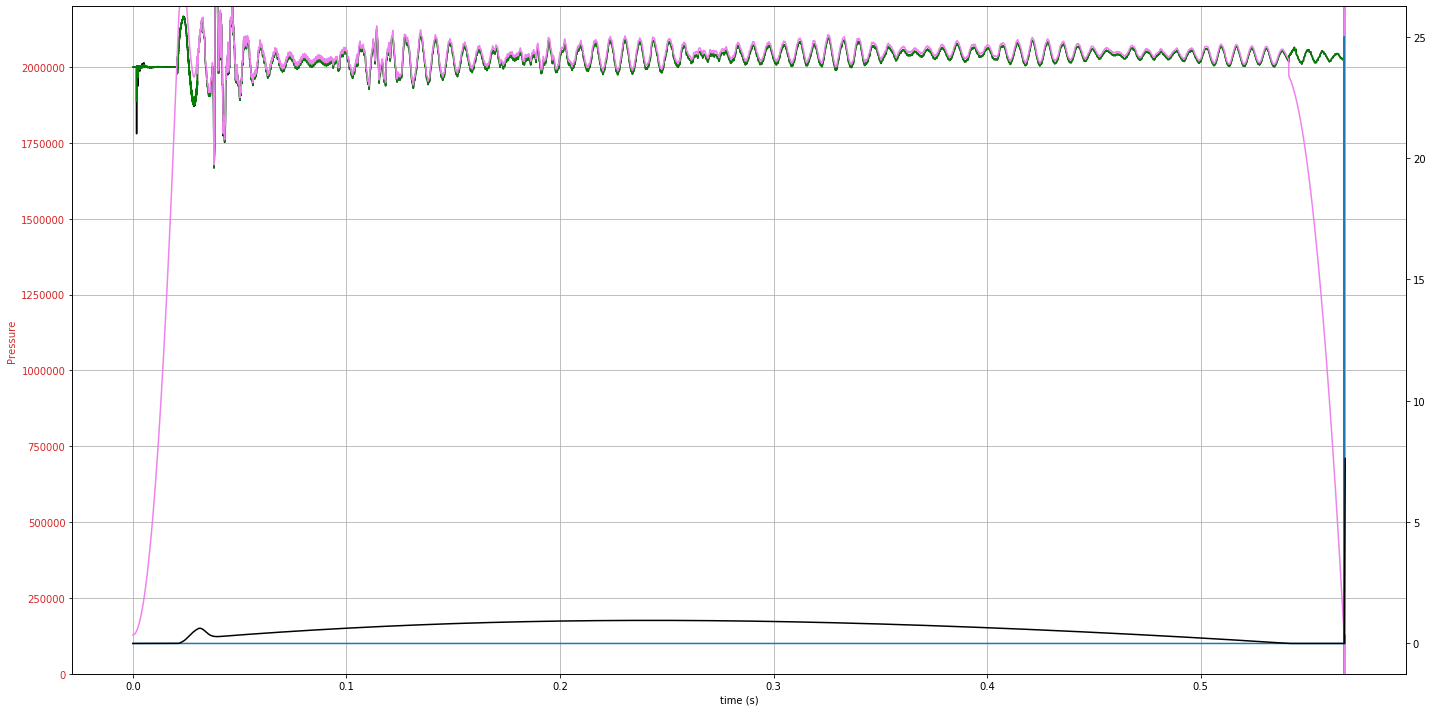

In [30]:
time = np.linspace(0, 1.35, int(pfield1[:,-2].shape[0]))
#plt.figure(figsize=(16, 10))
fig, ax1 = plt.subplots(figsize=(20, 10))
#plt.subplot(1, 2, 1)
#plt.plot(vfield[:,0])
#plt.plot(1, 2, 2)
val1 = 0
val = -8000
#val1 = 0
#val = -1

#upper_force = upperp_field[val1:val, 0] + gfield[val1:val, 0] + springforce[val1:val, 0]
#lower_force = lowp_field[val1:val, 0] + contact_pressure[val1:val, 0]
#result1 = lower_force - upper_force
#result2 = flow_field[val1:val, 0] - gfield[val1:val, 0] - springforce[val1:val, 0] - dampingfield[val1:val, 0]
#upper_flow = gfield[val1:val, 0] + springforce[val1:val, 0] + dampingfield[val1:val, 0]
#lower_flow = flow_field[val1:val, 0]
#ax1.plot(time[val1:val], upper_flow, color='red')
#ax1.plot(time[val1:val], lower_flow, color='blue')


#plt.subplot(1, 2, 2)
#ax1.plot(result1[val1:val])
#ax1.plot(result2[val1:val])
#ax1.plot(time[val1:val], upperp_field[val1:val, 0], color='red')
#ax1.plot(time[val1:val], lowp_field[val1:val, 0], color='green')
#ax1.plot(time[val1:val], dampingfield[val1:val, 0], color='blue')

#ax1.plot(time[val1:val], contact_pressure[val1:val, 0], color='black')
#ax1.plot(time[val1:val], springforce[val1:val, 0], color='grey')
#ax1.plot(time[val1:val], upper_force, color='red')
#ax1.plot(time[val1:val], lower_force, color='blue')

#plt.plot(time[val1:val], pfield3[val1:val, 1], color='red')
plt.plot(time[val1:val], pump_velocity[val1:val, 0], color='black')
plt.plot(time[val1:val], pfield2[val1:val, 1], color='green')
plt.plot(time[val1:val], pressure[val1:val, 0],color='violet')


#ax1.plot(time[val1:val], deltap[val1:val, 0], color='green')

#plt.xlim(time[val1],time[val])
#plt.ylim(0e5, 22e5)

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure', color=color)
ax1.set_ylim(0e5, 22e5)
plt.grid()
#ax1.plot(time[val1:val], pfield1[val1:val, 1], color='red')
#ax1.plot(time[val1:val], pfield2[val1:val, -2], color='green')
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(time[val1:val], disfield[val1:val, 0]*1000, color=color)  # we already handled the x-label with ax1
ax2.plot(time[val1:val], values[val1:val, 0]*1000, color = 'black')
#ax2.plot(time[val1:val], contact_pressure_force[val1:val, 0], color = 'green')
#ax2.plot(time[val1:val], spring_force[val1:val, 0], color = 'green')
#ax2.plot(time[val1:val], contact_pressure_force[val1:val, 0]+lower_pressure_force[val1:val, 0], color = 'black')
#ax2.plot(time[val1:val], flow_force[val1:val, 0]-spring_force[val1:val, 0], color = 'red')
#ax2.plot(time[val1:val], zeta[val1:val, 0], color='green')
#ax2.plot(time[val1:val], flow_field[val1:val, 0], color='black')
#ax2.tick_params(axis='y', labelcolor=color)

#plt.subplot(1, 2, 1)
#plt.plot(time[val1:val], disfield[val1:val, 0]*1000, color='black')
#plt.plot(time[val1:val], pump(time[val1:val]))
#plt.plot(time[val1:val], velfield[val1:val, 0], color='blue')
#plt.plot(time[val1:val], pfield2[val1:val, 1], color='red')
#pltplot(time[val1:val], pfield1[val1:val, -2], color='green')
#plt.ylim(-2e3, 2e3)
fig.tight_layout()
plt.show()

a = 70/60*(0.07**2)/4*np.pi*0.045

In [ ]:
#a = 70/60(0.07**2)/4*np.pi*0.045
#a/(2*0.025**2/4.0*np.pi)

In [ ]:
zetavalue = (2*(20e5-1.28e5)/((0.2058**2)*1000))

In [ ]:
import nptdms
from nptdms import TdmsFile
savepath = 'L:/017_Messdaten_Pascal/Messdatensatz 0,5m Fuellstand'
path = "L:/017_Messdaten_Pascal/Messdatensatz 0,5m Fuellstand"

In [ ]:
def writetdms(tdms, num):
    groups = tdms.groups()
    channels = tdms.group_channels(groups[0])
    channel_names = [channel.channel for channel in channels]
    obj = tdms.object(groups[0], channel_names[num])
    data = np.asarray(obj.data)
    

    return data



def datetime_to_float(timesignal):

    t0 = timesignal[0]
    t1 = timesignal[timesignal.shape[0] - 1]
    sec = (t1-t0).total_seconds()
    time = np.linspace(0, sec, timesignal.shape[0])

    return time

In [ ]:
size = 128000
tpAr = np.empty(size)
pAr = np.empty(size)

In [ ]:
ch = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25)
tdms = TdmsFile(path+'/Messungen_' +str(3)+".tdms")
tpAr = datetime_to_float(writetdms(tdms, ch[10]))
pAr = writetdms(tdms, ch[11])

In [ ]:
new_time = np.linspace(0, (time[-1000]-time[64000]), time[64000:-1000].shape[0])
plt.figure(figsize=(20, 10))
plt.plot(tpAr[7500:19250]-tpAr[7500], pAr[7500:19250]*1e5, label='Messung')
#plt.ylim(0e5, 23)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#ax2.set_ylim(0e5, 23e5)
plt.plot(new_time, pressure[64000:-1000, 0],color='red', label='Simulation')
plt.xlabel('Zeit in Sekunden', fontsize='14')
plt.ylabel('Druck in Pascal', fontsize='14')
plt.legend(fontsize='14')
plt.grid()
plt.savefig('L:/023_CavSim_Plots/Simulation_70Umin.png')


In [ ]:
print(new_time)

In [ ]:
print(tpAr[7500:19500]-tpAr[7500])